# imports and Load DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Data Cleaning

In [8]:
df.duplicated().sum()

165

In [9]:
df = df.drop_duplicates(keep='first')
df.shape

(32416, 12)

In [10]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

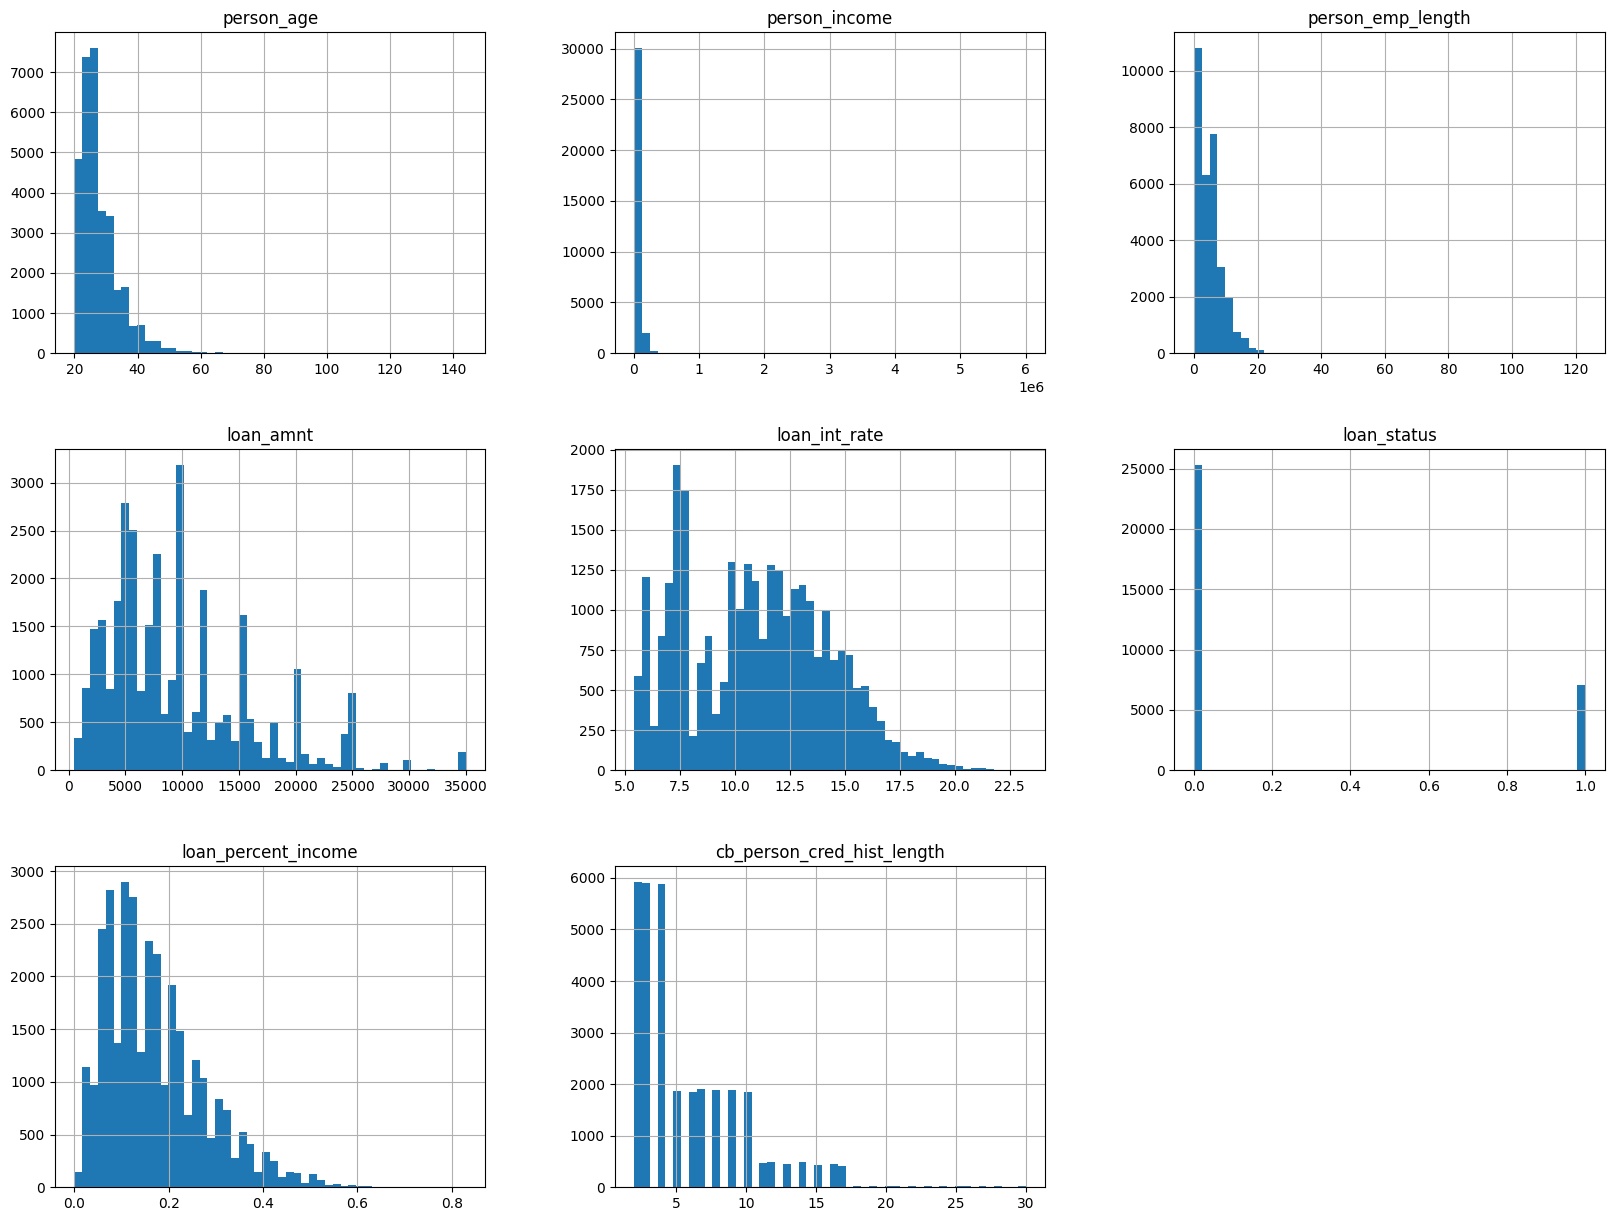

In [11]:
from matplotlib import pyplot as plt

df.hist(bins=50, figsize=(20, 15));

In [12]:
count_over_100 = (df['person_age'] > 100).sum()
count_over_100

5

In [13]:
data = df[df['person_age'] <= 100]

In [14]:
data.shape

(32411, 12)

In [15]:
data['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [16]:
data.loc[data['person_emp_length'] > 50, 'person_emp_length'] = np.nan

In [17]:
data['person_emp_length'].unique()

array([nan,  5.,  1.,  4.,  8.,  2.,  6.,  7.,  0.,  9.,  3., 10., 11.,
       18., 12., 17., 14., 16., 13., 19., 15., 20., 22., 21., 24., 23.,
       26., 25., 27., 28., 31., 41., 34., 29., 38., 30.])

In [18]:
data = data.copy()
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)

In [19]:
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)

# EDA 

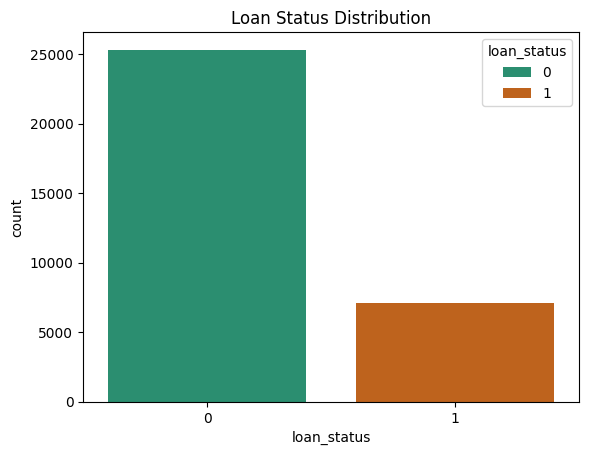

In [20]:
# EDA: Target Distribution
sns.countplot(x='loan_status', data=data,hue= 'loan_status',palette='Dark2')
plt.title("Loan Status Distribution")
plt.show()

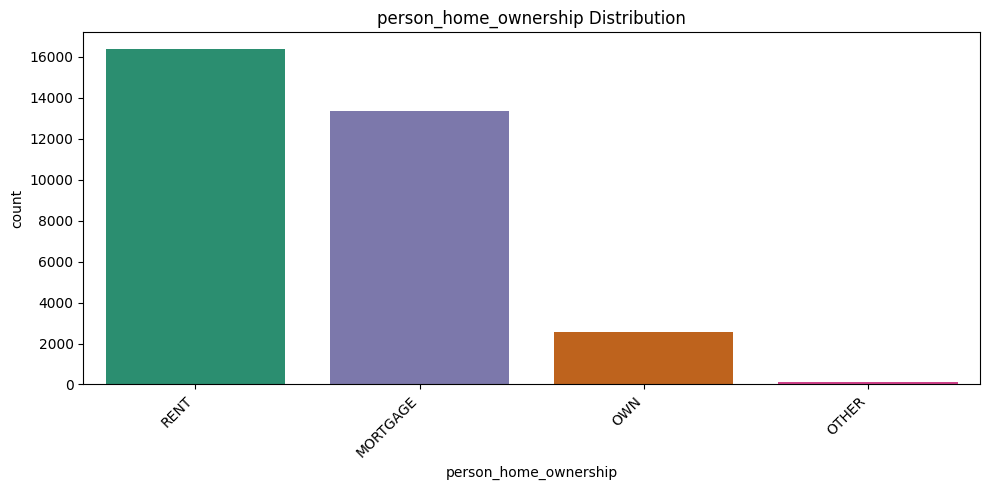

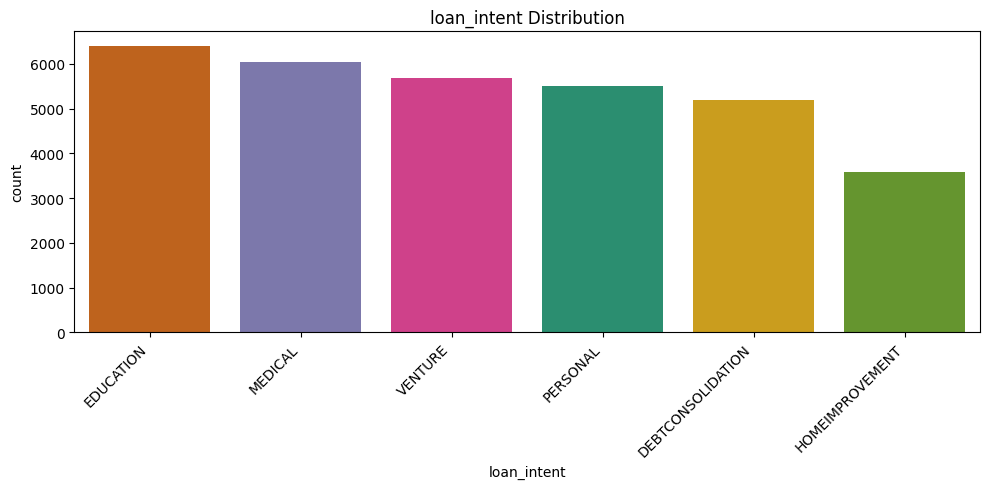

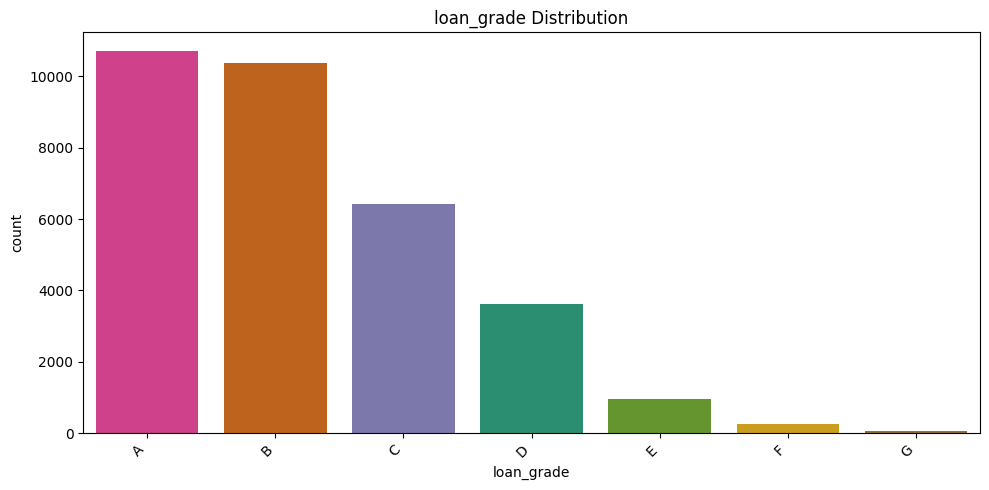

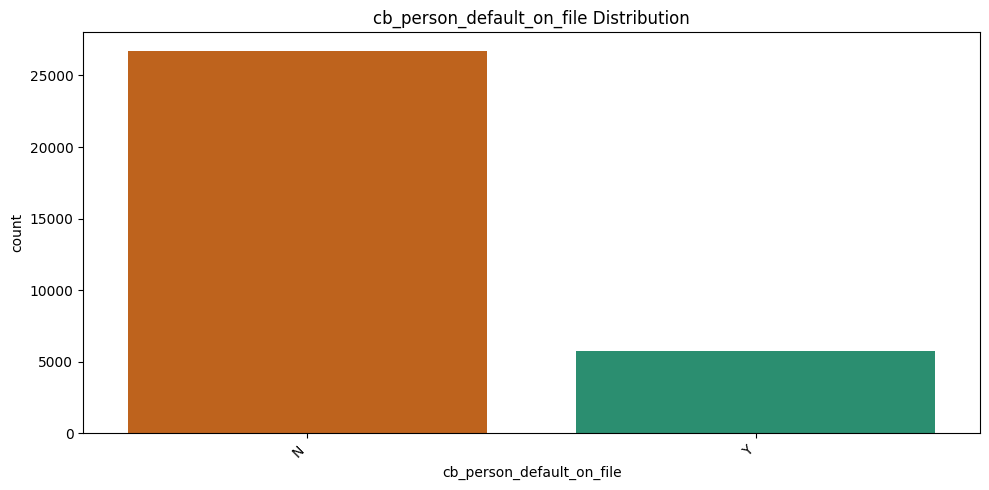

In [21]:
# EDA: Categorical Features Countplots
cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=data, order=df[col].value_counts().index,hue= col ,palette='Dark2')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

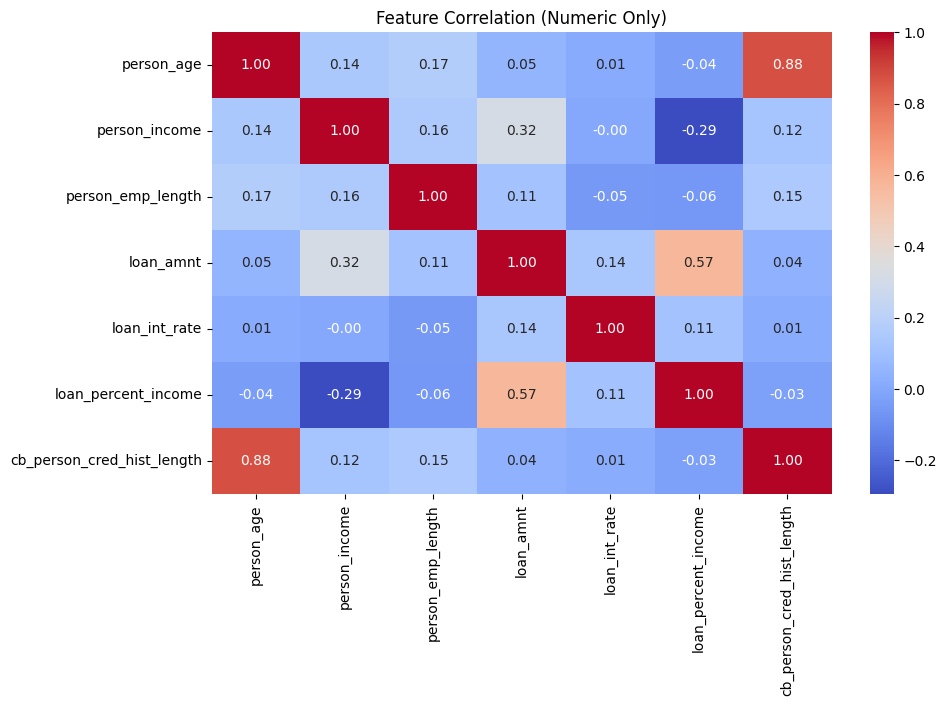

In [22]:
# EDA: Correlation Heatmap
num_cols = ['person_age','person_income','person_emp_length','loan_amnt',
            'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation (Numeric Only)")
plt.show()

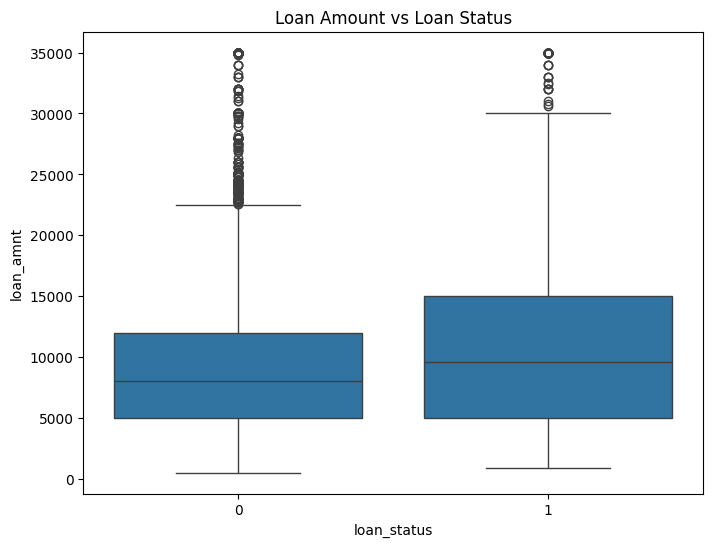

In [23]:
# EDA: Feature vs Target
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title("Loan Amount vs Loan Status")
plt.show()

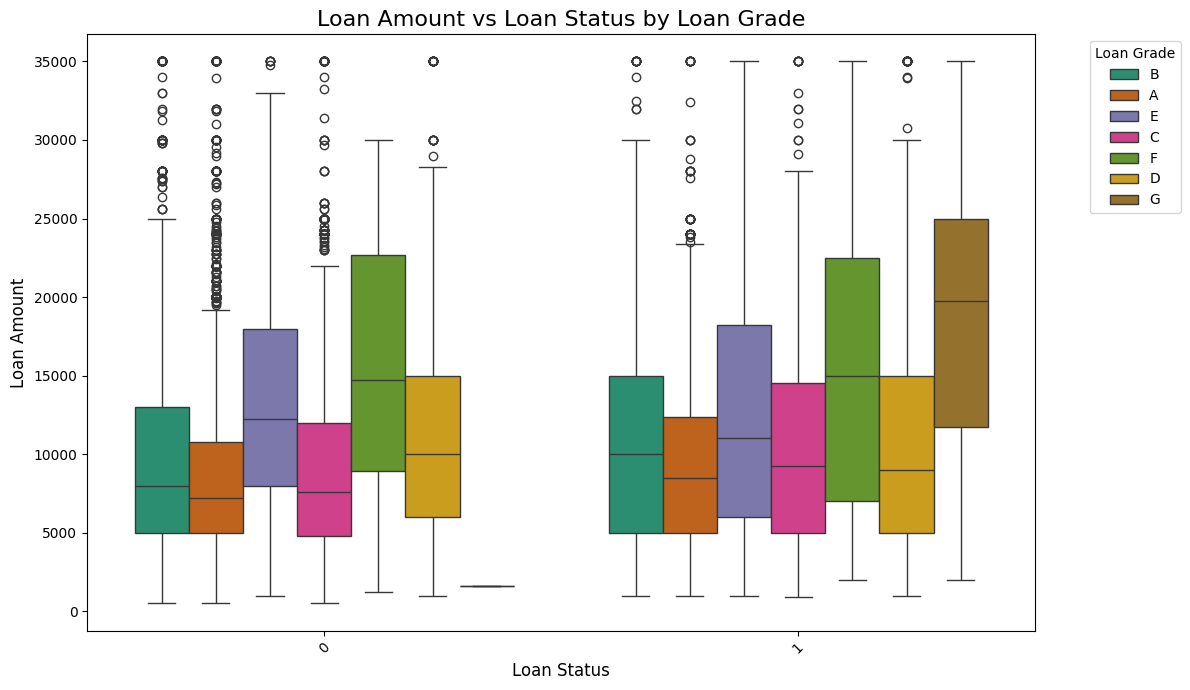

In [24]:
plt.figure(figsize=(12,7))

# Advanced boxplot: x = loan_status, y = loan_amnt, color by loan_status, group by loan_grade
sns.boxplot(
    x='loan_status',
    y='loan_amnt',
    hue='loan_grade',       # group grade
    data=data,
    palette='Dark2',       
    showfliers=True         
)

plt.title("Loan Amount vs Loan Status by Loan Grade", fontsize=16)
plt.ylabel("Loan Amount", fontsize=12)
plt.xlabel("Loan Status", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loan Grade', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

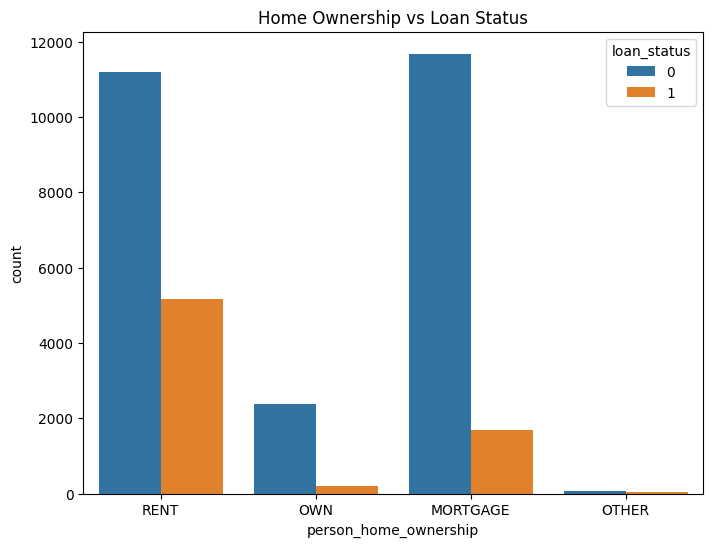

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=data)
plt.title("Home Ownership vs Loan Status")
plt.show()

# take data into csv in order to cluster and ML 

In [78]:
data.to_csv("/Users/nguyentoan/Documents/cleaned_data.csv", index=False)